1.Download the dataset

In [ ]:
#Dataset downloaded

2.Load the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

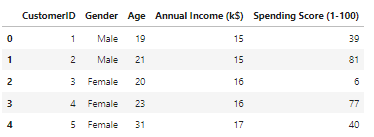

In [ ]:
df.tail()

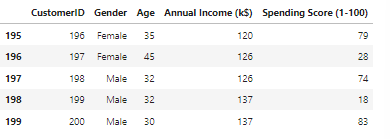

In [ ]:
df.columns

3.visualizations

Univariate Analysis

In [ ]:
sns.displot(df['Age'],color= 'green',bins=20)
plt.title('Age distribution plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

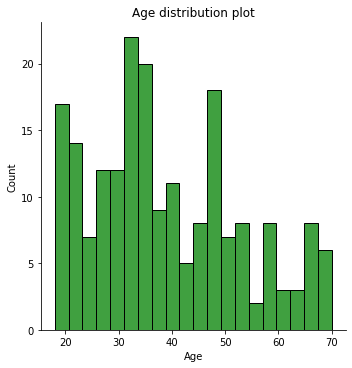

In [ ]:
sns.displot(df['Annual Income (k$)'],color= 'orange',bins=20)
plt.title('Annual Income distribution plot')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

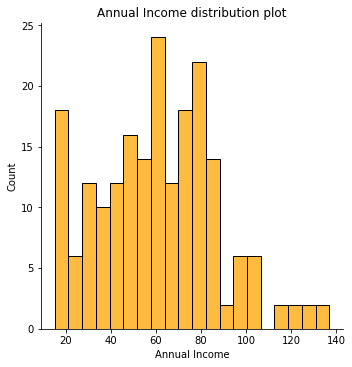

In [ ]:
sns.displot(df['Spending Score (1-100)'],color= 'purple',bins=20)
plt.title('Spending Score distribution plot')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

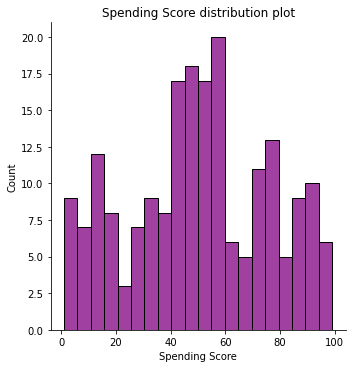

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'])
plt.title('Age count plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

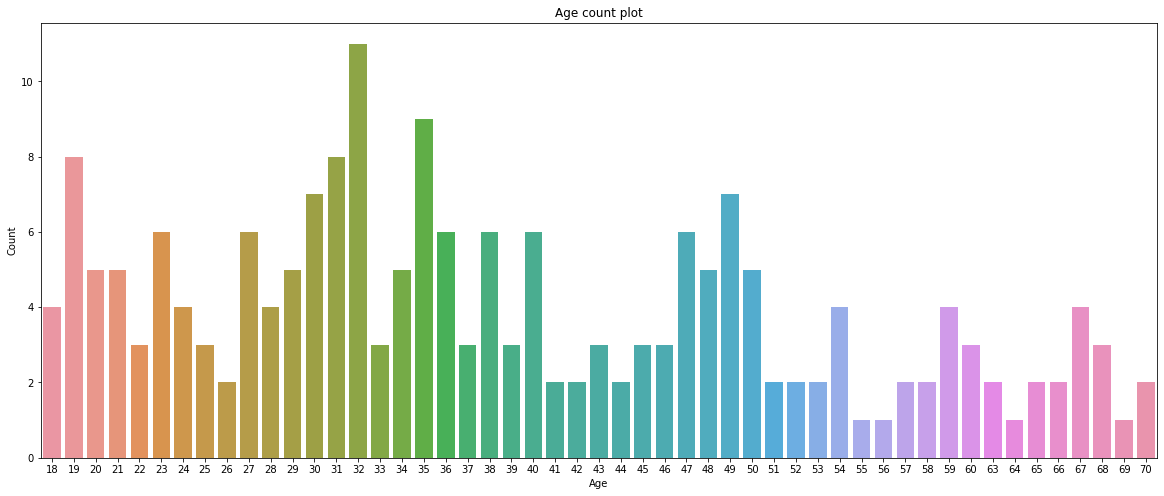

In [ ]:
lt.figure(figsize=(20,8))
sns.countplot(x=df['Annual Income (k$)'])
plt.title('Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

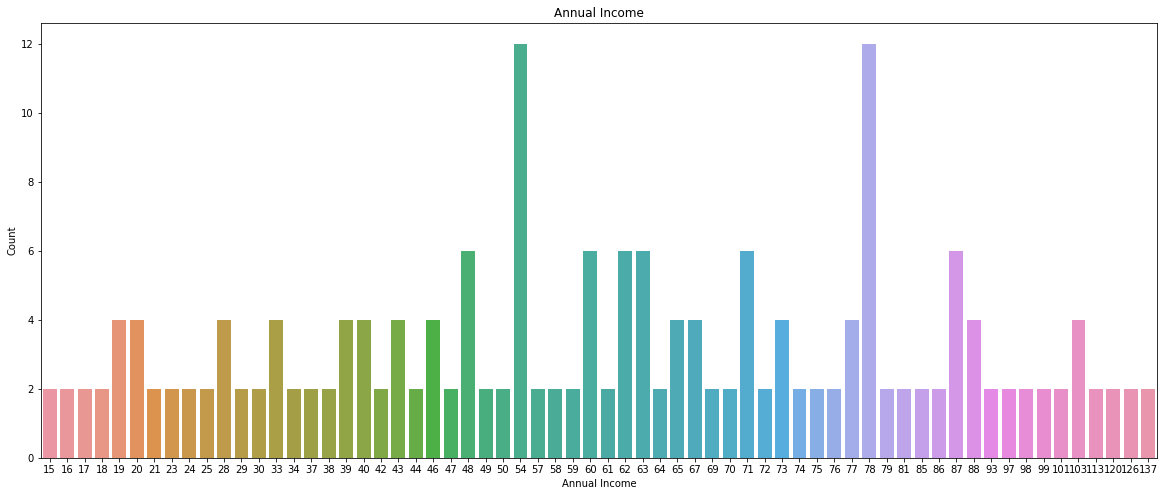

In [ ]:
sns.boxplot(x=df['Age'])
plt.title('Age box plot')
plt.xlabel('Age')
plt.show()

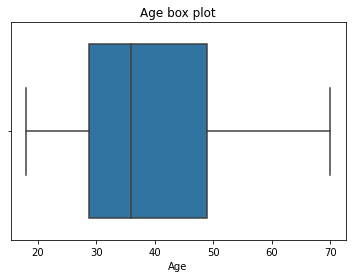

In [ ]:
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Annual Income box plot')
plt.xlabel('Annual Income')
plt.show()

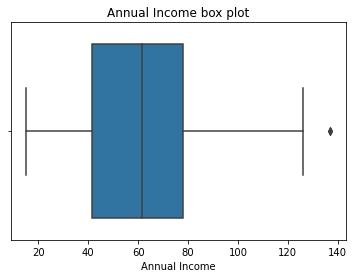

In [ ]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.xlabel('Spending Score')
plt.show()

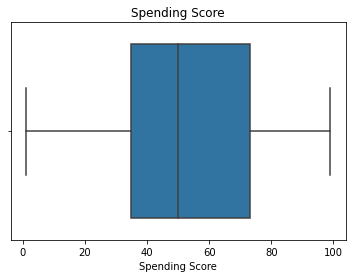

BI-Variate Analysis

In [ ]:
sns.lineplot(x=df['Age'],y=df['Spending Score (1-100)'])

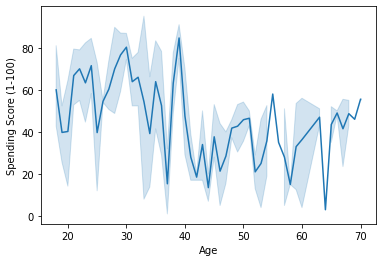

In [ ]:
sns.lineplot(x=df['Age'],y=df['Annual Income (k$)'])

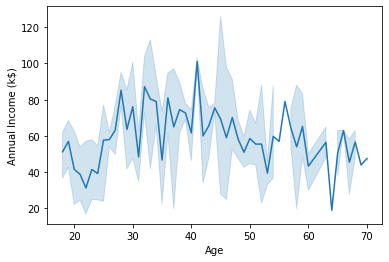

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Gender'],
                palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

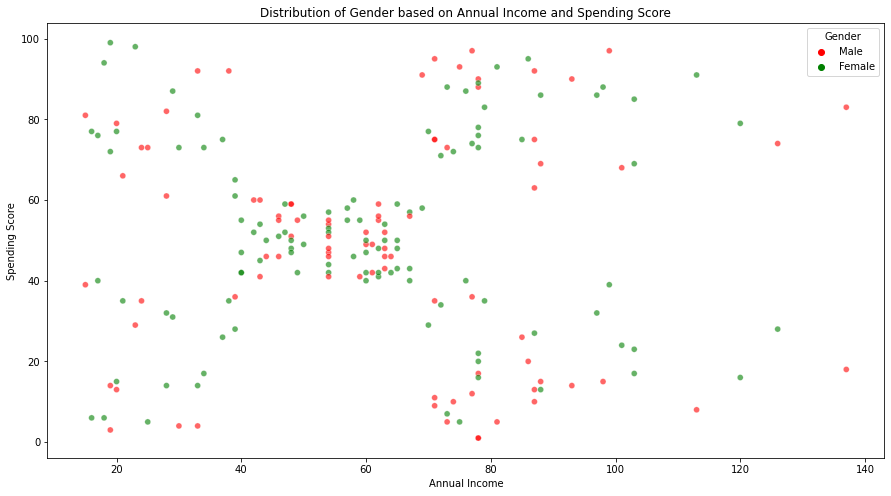

Multi-Variate Analysis

In [ ]:
sns.pairplot(df,hue='Gender')

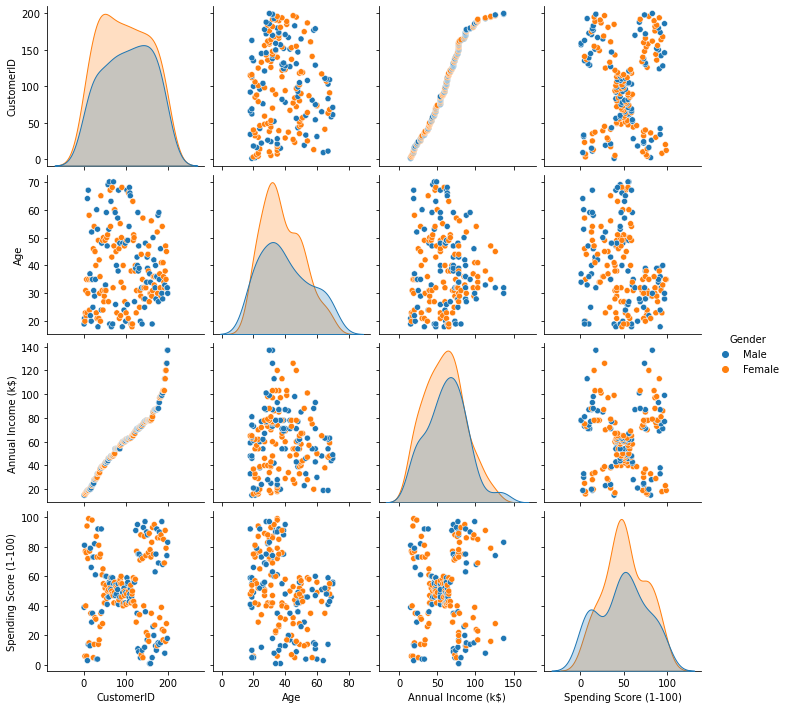

In [ ]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True);

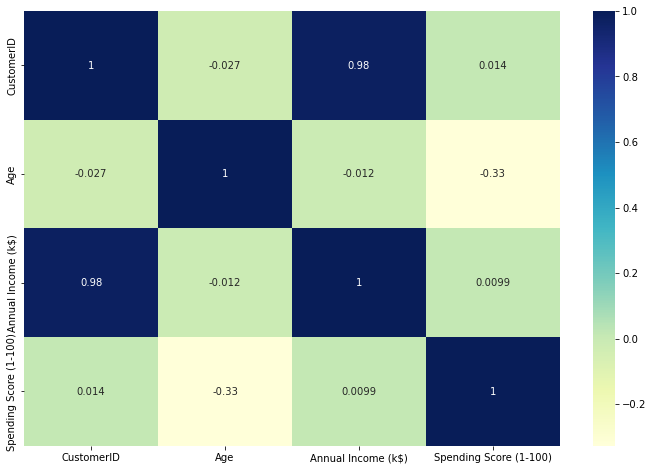

4.Descriptive statistics

In [ ]:
df.describe()

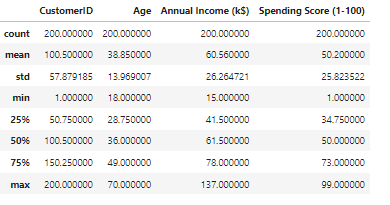

5.Handle the missing values

In [ ]:
df.isnull().sum()

6.find the outliers and replace the outliers

In [ ]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

Q1,Q3,IQR,lower_bound,upper_bound

In [ ]:
df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]

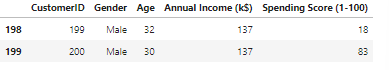

In [ ]:
df[(df['Annual Income (k$)'] > lower_bound) & (df['Annual Income (k$)'] < upper_bound)]

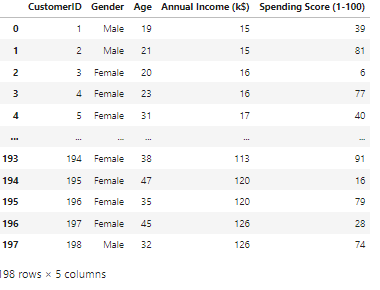

In [ ]:
sns.boxplot(x=df['Annual Income (k$)'])

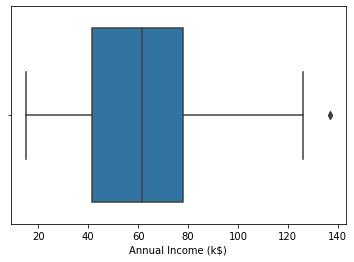

7.check for categorical columns and perform encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.head()

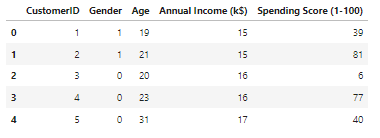

8.scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

9. perform any of the clustering algorithms

In [ ]:
Income_Spend = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

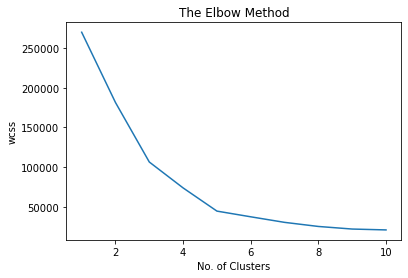

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'red', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'purple', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

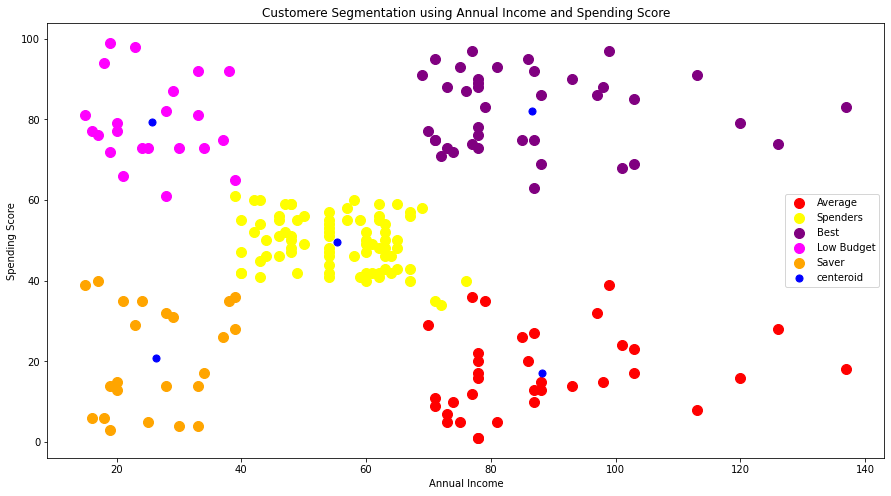

10.Add the cluster data with the primary dataset

In [ ]:
pd.Series(y_means)

In [ ]:
df['Result'] = pd.Series(y_means)

In [ ]:
df.head()

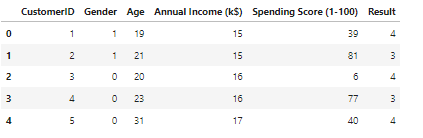

11.Split the data into dependent and independent variables

In [ ]:
df.info()

In [ ]:
x = df.iloc[:,1:5]

In [ ]:
x.head()

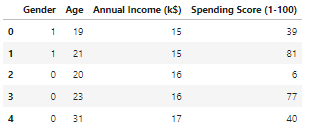

In [ ]:
y = df['Result']

In [ ]:
y.head()

12.Split the data into training and testing

In [ ]:
x.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train.head(2)

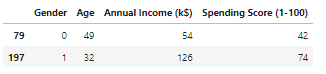

In [ ]:
x_train.shape

In [ ]:
x_test.head(2)

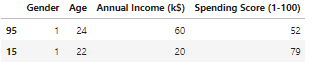

In [ ]:
x_test.shape

In [ ]:
y_train.head(2)

In [ ]:
y_train.shape

In [ ]:
y_test.head(2)

In [ ]:
y_test.shape

Build the model, Train the model and Test the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

param = {
    'max_depth':[3,6,9,12,15],
    'n_estimators' : [10,50,100,150,200] 
}

rf_search = RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),
                               n_jobs=-1,cv=5,verbose=3)

rf_search.fit(x_train, y_train)

In [ ]:
means = rf_search.cv_results_['mean_test_score']
params = rf_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

In [ ]:
rf = RandomForestRegressor(n_estimators=10, max_depth=9)
rf.fit(x_train,y_train)

rf_pred =  rf.predict(x_test)

16. Measure the performance using metrics

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2 Score :',metrics.r2_score(y_test,rf_pred))